# INFO
- experiment: growing gooey
- stimulation: rsvp 100ms(stim) / 75ms(blank) / 2500ms break between tokens / 15 flashes per char / 6 tokens max per shape for a max time of 18 seconds.

- users tested: 1
- devices tested : 
    - OpenBCI: freq 125Hz / channels FC3,FCz,FC4,T7,C3,Cz,C4,T8,P7,P3,Pz,P4,P8,O1,O2,Oz
- metric used : ...


This code demonstrates how to read epoched data which already has been processed and used for predictions. It loads and concatenates each epoch to plot the data and compare it with training conditions to show if similar patterns appear.

# DEPENDENCIES

In [10]:
# BUILT-IN
import os
import math
from collections import OrderedDict

# DATAFRAMES
import numpy as np
import pandas as pd


# PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# MNE
from mne import create_info, concatenate_raws,concatenate_epochs, read_epochs,Epochs, find_events
from mne.channels import read_montage
from mne.io import RawArray

# SETTINGS

In [11]:
the_folder_path = "../data/growing_gooey" # relative datasets path
the_user = "compmonks" # check available users in data folder or add new ones
the_device = "openbci_v207" # available devices
the_freq = 125 # 125 (OpenBCI) # Sampling Frequency in Hertz
the_units = "uVolts" # "uVolts" # "Volts" # unit of received data from device
#the_predictor_name = "compmonks_T2_erp-cov-ts.pkl" # trained discriminator in the data folder
the_montage = "standard_1020" # "standard_1020" (OpenBCI) # channels montage
the_markers = {'Non-Target': 2, 'Target': 1} # markers from stim data
break_epoch = 2500 # time in ms of break between each character spelling sessions
blank_index = 12 # index used to mark a non-flashing time
sns.set_context('talk') # seaborn settings
sns.set_style('white') # seaborn settings
diverging_color_palette = "coolwarm" # seaborn settings
categorical_color_palette = "Paired" # seaborn settings
training_color_palette = "viridis"
# training data for comparison
training_folder_path = "../data/p300_speller/"
the_training_path = os.path.join(training_folder_path,the_device,the_user,"training")
the_additional_path = os.path.join(training_folder_path,the_device,the_user,"additional")
all_sessions_data_path = list(os.walk(the_training_path)) + list(os.walk(the_additional_path))

# UTILS

In [ ]:
def plotConditions(the_epochs, unit, channels_num, diff_waveform ,conditions, palette):
    """ Plot ERP conditions. """

    confidence_interval = 97.5 # confidence interval in range [0, 100]
    bootstrap_samples = 1000 # number of bootstrap samples
    title = 'ERP Conditions'
    ylim = (-6,6) #(tuple): (ymin, ymax)
    if isinstance(conditions, dict):
        conditions = OrderedDict(conditions)
        palette = sns.color_palette(diverging_color_palette, len(conditions))
        if unit == "Volts":
            X = the_epochs.get_data() 
        elif unit == "uVolts":
            X = the_epochs.get_data() * 1e6 # convert from Volts to uVolts
        else:
            raise        
        times = the_epochs.times
        y = pd.Series(the_epochs.events[:, -1])
        # get the amount of rows and columns and set axes
        fig_cell = math.ceil(math.sqrt(channels_num))
        fig, axes = plt.subplots(fig_cell, fig_cell, figsize=[12, 6],sharex=True, sharey=True)
        axes = [axes[row, col] for row in range(fig_cell) for col in range(fig_cell)]
        # make the subplots
        for ch in range(channels_num):
            for cond, color in zip(conditions.values(), palette):
                sns.tsplot(X[y.isin(cond), ch],
                           time = times, 
                           color = color,
                           n_boot = bootstrap_samples, 
                           ci = confidence_interval, 
                           ax = axes[ch])
            if diff_waveform:
                diff = (np.nanmean(X[y == diff_waveform[1], ch], axis=0) - np.nanmean(X[y == diff_waveform[0], ch], axis=0))
                axes[ch].plot(times, diff, color='darkblue', lw=0.25)
            axes[ch].set_title(the_epochs.ch_names[ch])
            axes[ch].title.set_fontsize(8)
            axes[ch].set_ylim(ylim)
            axes[ch].axvline(x=0, ymin=ylim[0], ymax=ylim[1], color='grey',lw=0.5, label='_nolegend_')
            axes[ch].axvline(x=0.3, ymin=ylim[0], ymax=ylim[1], color='black',lw=0.5,ls=":", label='0.3')
        axes[0].set_ylabel('Amplitude (uV)')
        axes[-1].set_xlabel('Time (s)')
        if diff_waveform:
            legend = (['{} - {}'.format(diff_waveform[1], diff_waveform[0])] + list(conditions.keys()))
        else:
            legend = conditions.keys()
        axes[-1].legend(legend,loc='best',fontsize='xx-small')
        sns.despine()
        plt.tight_layout()
        if title:
            fig.suptitle(title, fontsize=20)
        #
        plt.show()
    else:
        print("bad conditions")

# CONCATENATE EPOCHS AND PLOT CONDITIONS

device:openbci_v207 user:compmonks dir:session_003
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-41-17-805138.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_003/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-41-17-805138.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-39-15-154463.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_003/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-39-15-154463.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-40-15-595340.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_003/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-40-15-595340.fif) does not conform to MNE naming conventions. All epochs files shou

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_003/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-41-17-805138.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_003/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-39-15-154463.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_003/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-

   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-38-13-511994.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_003/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-38-13-511994.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-42-18-192829.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_003/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-42-18-192829.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
device:openbci_v207 user:compmonks dir:session_004
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-46-23-241172.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_004/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-46-23-241172.fif) does not conform to MNE naming conventions. All epochs files shou

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_003/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-38-13-511994.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_003/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-42-18-192829.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_004/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-

   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-50-25-556015.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_004/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-50-25-556015.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-47-24-612508.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_004/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-47-24-612508.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-49-25-362073.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_004/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-49-25-362073.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_004/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-50-25-556015.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_004/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-47-24-612508.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_004/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-

   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-54-58-582916.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_005/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-54-58-582916.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-57-6-973281.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_005/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-57-6-973281.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-56-4-201062.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_005/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-56-4-201062.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_005/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-54-58-582916.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_005/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-57-6-973281.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_005/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-5

device:openbci_v207 user:compmonks dir:session_002
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-30-24-955794.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_002/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-30-24-955794.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-32-27-97583.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_002/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-32-27-97583.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-34-28-329694.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_002/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-34-28-329694.fif) does not conform to MNE naming conventions. All epochs files should

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_002/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-30-24-955794.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_002/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-32-27-97583.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_002/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-3

   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-31-26-375618.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_002/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-31-26-375618.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
device:openbci_v207 user:compmonks dir:session_007
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-16-11-335222.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_007/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-16-11-335222.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-20-19-374573.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_007/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-20-19-374573.fif) does not conform to MNE naming conventions. All epochs files shou

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_002/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-31-26-375618.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_007/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-16-11-335222.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_007/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-

   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-18-15-310725.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_007/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-18-15-310725.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-19-17-301868.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_007/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-19-17-301868.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-17-13-851115.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_007/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-17-13-851115.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_007/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-18-15-310725.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_007/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-19-17-301868.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_007/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-

   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-10-27-629853.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_000/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-10-27-629853.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-11-28-887326.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_000/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-11-28-887326.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-9-26-770578.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_000/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-9-26-770578.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.f

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_000/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-10-27-629853.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_000/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-11-28-887326.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_000/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-

device:openbci_v207 user:compmonks dir:session_009
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-34-13-306434.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_009/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-34-13-306434.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-35-15-586444.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_009/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-35-15-586444.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-33-11-688537.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_009/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-33-11-688537.fif) does not conform to MNE naming conventions. All epochs files shou

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_009/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-34-13-306434.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_009/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-35-15-586444.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_009/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-

   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-36-17-254252.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_009/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-36-17-254252.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-32-7-289889.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_009/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-32-7-289889.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
device:openbci_v207 user:compmonks dir:session_008
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-28-17-614488.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_008/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-28-17-614488.fif) does not conform to MNE naming conventions. All epochs files should

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_009/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-36-17-254252.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_009/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-32-7-289889.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_008/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-2

   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-25-10-704629.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_008/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-25-10-704629.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-26-12-809754.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_008/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-26-12-809754.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-27-15-353268.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_008/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-27-15-353268.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_008/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-25-10-704629.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_008/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-26-12-809754.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_008/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-

   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-24-5-822324.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_008/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-24-5-822324.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
device:openbci_v207 user:compmonks dir:session_001
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-22-10-219014.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_001/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-22-10-219014.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-25-13-48274.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_001/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-25-13-48274.fif) does not conform to MNE naming conventions. All epochs files should e

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_008/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-24-5-822324.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_001/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-22-10-219014.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_001/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-2

   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-24-12-131296.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_001/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-24-12-131296.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-26-14-123293.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_001/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-26-14-123293.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-23-12-193875.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_001/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-23-12-193875.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_001/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-24-12-131296.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_001/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-26-14-123293.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_001/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_17-

device:openbci_v207 user:compmonks dir:session_006
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-10-26-978767.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_006/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-10-26-978767.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-11-30-262250.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_006/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-11-30-262250.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
   found:compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-9-24-268827.fif
This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_006/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-9-24-268827.fif) does not conform to MNE naming conventions. All epochs files should

<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_006/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-10-26-978767.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_006/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-11-30-262250.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
<ipython-input-13-b60c705f8e89>:15: RuntimeWarning: This filename (../data/growing_gooey/openbci_v207/compmonks/testing/session_006/compmonks_G5_OPENBCI-Cytonv207_2019-6-25_18-

8115 matching events found
No baseline correction applied


/Users/pierrecutellic/py35/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


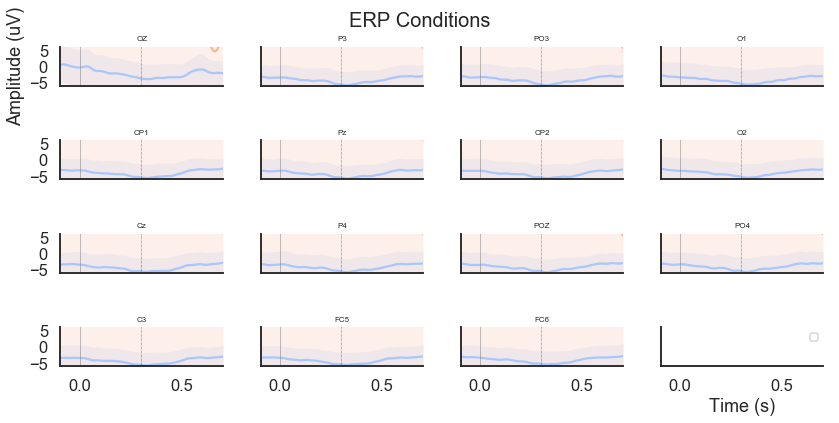

Creating RawArray with float64 data, n_channels=17, n_times=47650
    Range : 0 ... 47649 =      0.000 ...   381.192 secs
Ready.


In [ ]:
list_of_epochs = [] # an empty list of found epochs to be concatenated
conditions = OrderedDict()
conditions['2: Non-target'] = [the_markers["Non-Target"]]
conditions['1: Target'] = [the_markers["Target"]]
the_data_path = os.path.join(the_folder_path,the_device,the_user,"testing")
raw = []
# loop through subdirs and concatenate epochs
for root, subdirs, files in os.walk(the_data_path):
    for dirs in subdirs:
        print("device:{} user:{} dir:{}".format(the_device,the_user,dirs))
        file_list = os.listdir(os.path.join(root,dirs))
        for _f in file_list:
            if ".fif" in _f:
                print("   found:{}".format(_f))
                list_of_epochs.append(read_epochs(os.path.join(root,dirs,_f),preload=False, verbose=False))
# concatenate all found epochs
the_epochs = concatenate_epochs(list_of_epochs)#.drop_bad()
# plot conditions
plotConditions(the_epochs, the_units, len(the_epochs.ch_names)-1, diff_waveform = (2,1) ,conditions = conditions, palette = diverging_color_palette)       
# training data
for root, subdirs, files in all_sessions_data_path:
    for dirs in subdirs:
        file_list = [fn for fn in os.listdir(os.path.join(root,dirs)) if fn.endswith("hdf5")]
        if len(file_list) == 2:
            if "FEEDBACK" in file_list[0]:
                dataF = pd.read_hdf(os.path.join(root,dirs,file_list[0]),'data')
                dataA = pd.read_hdf(os.path.join(root,dirs,file_list[1]),'EEG')
            else:
                dataF = pd.read_hdf(os.path.join(root,dirs,file_list[1]),'data')
                dataA = pd.read_hdf(os.path.join(root,dirs,file_list[0]),'EEG')
            #
            dataA['Stim'] = np.nan
            prev_marker = 0
            for index,row in dataA.iterrows():
                new_marker = dataF.iloc[dataF.index.get_loc(pd.to_datetime(index),method='nearest')]['marker'].astype(int)
                if prev_marker == 0:
                    if new_marker != 0:
                        row['Stim'] = new_marker
                        prev_marker = new_marker
                    else:
                        row['Stim'] = 0
                else:
                    row['Stim'] = 0
                    prev_marker = new_marker

            channel_names = list(dataA.keys())
            # temporary fix on possibly erroneous channel labelling on some of the former data
            for _it,_ch in enumerate(channel_names):
                if _ch == "P2":
                    channel_names[_it] = "O2"
            #
            channel_types = ['eeg'] * (len(list(dataA.keys()))-1) + ['stim']
            the_data = dataA.values[:].T
            the_data[:-1] *= 1e-6 if the_units == "uVolts" else 1
            info = create_info(ch_names = channel_names, 
                               ch_types = channel_types,
                               sfreq = the_freq, 
                               montage = the_montage)
            raw.append(RawArray(data = the_data, info = info))
the_raw = concatenate_raws(raw)
the_events = find_events(the_raw)
the_epochs = Epochs(the_raw,
                    events = the_events, 
                    event_id = the_markers,
                    tmin = -0.1, tmax = 0.7,
                    baseline = None,
                    reject = {'eeg': 75e-6},
                    preload = True,
                    verbose = False,
                    picks = list(range(len(channel_names)-1))
                   )
the_sample_drop = (1 - len(the_epochs.events)/len(the_events)) * 100
print("sample drop: {} %".format(the_sample_drop))
plotConditions(the_epochs, the_units, len(the_epochs.ch_names)-1, diff_waveform = (2,1) ,conditions = conditions, palette = training_color_palette)
#
#plt.savefig(os.path.join(the_data_path,"CONDITIONS.png"),dpi = 800,format = "png")
plt.show()